In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [2]:
# Load Dataset
TRAIN_PATH = "D:/Mca_upes/Sem-2/Pattern-Recognition/Lab Experiments/Dataset/Testing"
TEST_PATH = "D:/Mca_upes/Sem-2/Pattern-Recognition/Lab Experiments/Dataset/Training"
IMAGE_SIZE = (256, 256)

In [3]:
def load_images_and_labels(dataset_path):
    images, labels = [], []
    class_names = []
    
    if not os.path.exists(dataset_path):
        print(f"Dataset path {dataset_path} does not exist.")
        return np.array(images), np.array(labels), class_names
    
    classes = sorted(os.listdir(dataset_path))
    class_names = classes  # Store class names
    
    for cls in classes:
        class_dir = os.path.join(dataset_path, cls)
        if not os.path.isdir(class_dir):
            print(f"Skipping {cls}, not a directory.")
            continue
        for file in os.listdir(class_dir):
            img_path = os.path.join(class_dir, file)
            if os.path.isfile(img_path):
                img = load_img(img_path, target_size=IMAGE_SIZE)
                images.append(img_to_array(img) / 255.0)
                labels.append(cls)  # Store class label
    
    return np.array(images), np.array(labels), class_names

In [4]:
# Load training and testing data
train_images, train_labels, class_names = load_images_and_labels(TRAIN_PATH)
test_images, test_labels, _ = load_images_and_labels(TEST_PATH)

In [5]:
# Encode labels
label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_labels)
test_labels = label_encoder.transform(test_labels)


In [6]:
#  Convert labels to one-hot encoding
num_classes = len(class_names)
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

In [7]:
# Define CNN-based classification model
def cnn_classification_model(input_size=(256, 256, 3), num_classes=2):
    inputs = layers.Input(input_size)

    # Feature Extraction
    c1 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    c2 = layers.MaxPooling2D((2, 2))(c2)

    c3 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    c3 = layers.MaxPooling2D((2, 2))(c3)
    
    # Fully Connected Layers
    flat = layers.Flatten()(c3)
    dense1 = layers.Dense(128, activation='relu')(flat)
    outputs = layers.Dense(num_classes, activation='softmax')(dense1)

    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [8]:
# Initialize and train model
model = cnn_classification_model(input_size=(256, 256, 3), num_classes=num_classes)
history = model.fit(train_images, train_labels, validation_data=(test_images, test_labels), batch_size=16, epochs=10)

Epoch 1/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 58s 702ms/step - accuracy: 0.5093 - loss: 1.2548 - val_accuracy: 0.7332 - val_loss: 0.6334
Epoch 2/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 47s 577ms/step - accuracy: 0.8221 - loss: 0.4384 - val_accuracy: 0.7882 - val_loss: 0.5646
Epoch 3/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 50s 607ms/step - accuracy: 0.9104 - loss: 0.2318 - val_accuracy: 0.7770 - val_loss: 0.5924
Epoch 4/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 50s 618ms/step - accuracy: 0.9443 - loss: 0.1527 - val_accuracy: 0.7747 - val_loss: 0.9051
Epoch 5/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 47s 574ms/step - accuracy: 0.9648 - loss: 0.0928 - val_accuracy: 0.7829 - val_loss: 0.8603
Epoch 6/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 47s 573ms/step - accuracy: 0.9791 - loss: 0.0580 - val_accuracy: 0.8104 - val_loss: 0.7713
Epoch 7/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 49s 606ms/step - accuracy: 0.9903 - loss: 0.0364 - val_accuracy: 0.8298 - val_loss: 0.9385
Epoch 8/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 48s 592ms/step - accuracy: 0.9995 - loss: 0.0033 - val_accu

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


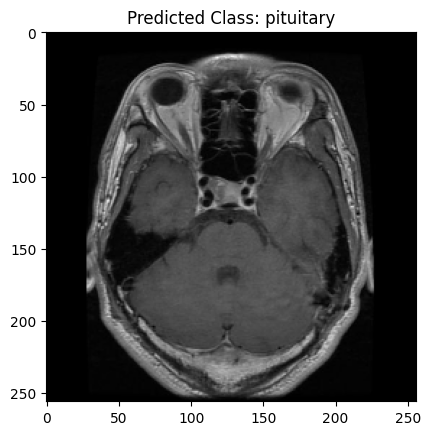

In [11]:
# Predict on a test sample
sample_idx = np.random.randint(len(test_images))
pred_class = model.predict(test_images[sample_idx:sample_idx+1])[0]
predicted_label = class_names[np.argmax(pred_class)]
# Display Image
plt.imshow(test_images[sample_idx])
plt.title(f"Predicted Class: {predicted_label}")
plt.show()

